# Imports and Project Initiation

In [239]:
#data manipulation
import numpy as np 
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regular expressions
import re

C:\Users\mtavarez\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


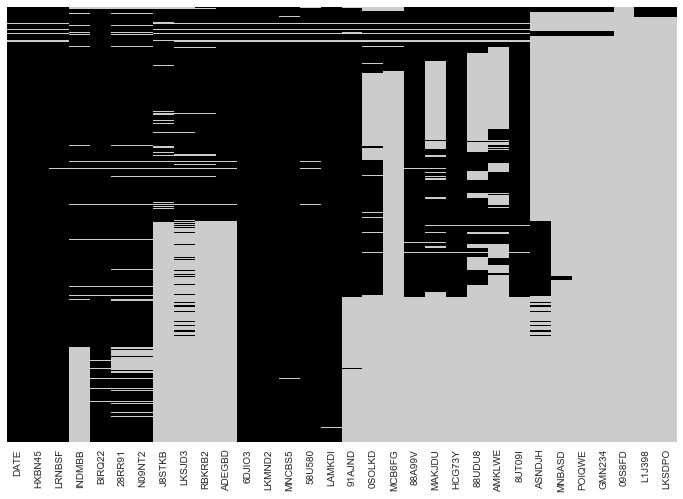

In [240]:
#read in csv formatted data
df = pd.read_csv('DATA1.csv')

#generate heatmap of null values to identify missing values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cmap='spectral', cbar=False)

C:\Users\mtavarez\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


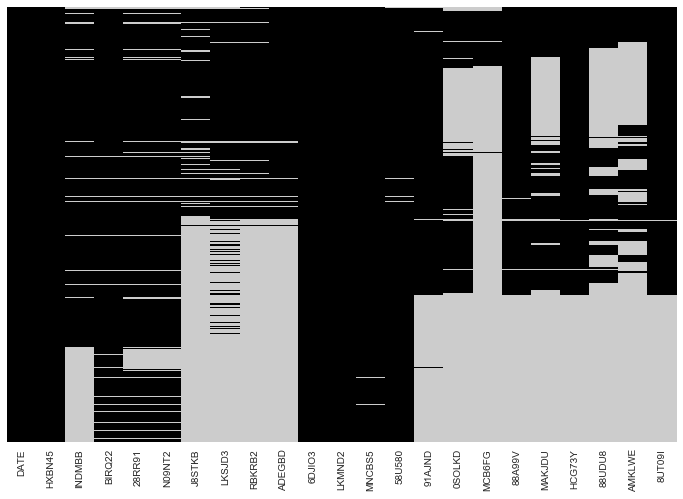

In [241]:
#drop redundant or unusable columns
df.drop(['ASNDJH', 'MNBASD', 'POIQWE', 'GMN234', '09S8FD', 'L1J398', 'L1J398', 'LAMKDI', 'LRNBSF', 'LKSDPO'], axis=1, inplace=True)
#drop columns where HXBN45 and Date are missing, these are important
df.drop(df[df['HXBN45'].isnull()].index, inplace=True)
df.drop(df[df['DATE'].isnull()].index, inplace=True)

#updated null heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cmap='spectral', cbar=False)

# Cleaning Our Data

## Date and Batch Number

In [242]:
##quickly looking for any odd HXBN45 trends
df['HXBN45'].value_counts()

AQC-359              2
BRC-142              2
DRC-470              1
BPC-487              1
JMC-458              1
FOC-114              1
JLC-480              1
LHC-132              1
CKC-295              1
HSC-529              1
KMC-195              1
ARC-323              1
CRC-509              1
GQC-239              1
BSC-356              1
HQC-530              1
LNC-107              1
CLC-349/pails-348    1
GQC-162              1
AOC-317              1
EQC-179              1
DQC-246              1
BOC-603              1
BMC-268              1
GHC-293              1
MKC-334              1
MOC-481              1
HJC-133              1
APC-008              1
LPC-389              1
                    ..
CQC-460              1
MPC-239              1
GMC-183              1
FPC-407              1
BSC-312              1
LGC-284              1
DQC-139              1
LQC-333              1
GSC-119              1
GJC-243              1
DOC-546              1
JHC-300              1
DNC-545    

In [243]:
#drop the rows where HXBN45 has a duplicate by using their index values
df.drop(df[df['HXBN45'] == 'BRC-142'].index, inplace=True)
df.drop(df[df['HXBN45'] == 'AQC-359'].index, inplace=True)

#view which rows have a HXBN45 thats not the standard (7 characters)
df[df['HXBN45'].apply(len) > 7]

,DATE,HXBN45,INDMBB,BIRQ22,28RR91,N09NT2,J8STKB,LKSJD3,RBKRB2,ADEGBD,...,58U580,91AJND,0SOLKD,MCB6FG,88A99V,MAKJDU,HCG73Y,88UDU8,AMKLWE,8UT09I
414,8/17/2007,HHC-216(DT-4987),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,70,72,9/7/2007,72,65,68,NaN,NaN,82
432,8/28/2007,HHC-397(HHC-294),8/24/2007,HHC-358,61.4,"15,200",300,"7,800",89,"8,700",...,572,64,9/11/2007,63,58,NaN,58,NaN,NaN,56
532,10/18/2007,KHC-407/label as,10/8/2007,KHC-194,60.8,"12,500",500,"8,200",73,"11,500",...,572,68,NaN,NaN,68,NaN,54,NaN,NaN,64
534,10/19/2007,KHC-408/label as,10/10/2007,KHC-208,58.9,"15,800",500,"8,800",77,"11,200",...,572,55,NaN,NaN,55,NaN,55,NaN,NaN,53
613,12/3/2007,MHC-101(LHC-473),11/26/07/11/27/07,LHC-407,59,"16,500",500,"11,400",68,"16,600",...,572,49,NaN,NaN,55,NaN,47,NaN,NaN,42
659,1/10/2008,DT-2020/AJC-190,12/4/07/12/28/07,MHC-186/MHC-369,59.8 / 60.2,"12,200 /10,200",550,"8,200",64,"14,200",...,601,70,NaN,NaN,56,NaN,50,NaN,NaN,50
675,1/30/2008,DT-2020/AJC-342,12/10/08/12/18/07,MHC-303/MHC-335,57.4 / 59.3,"15,400 / 14,000",750,"8,800",58,"14,000",...,601,67,NaN,NaN,73,NaN,57,NaN,NaN,56
676,2/11/2008,DT-2020/BJC-129,1/25/08 / 2/4/08,AJC-328/BJC-105,59.3 / 58.8,"9,200 / 11,000",500,"8,400",65,"13,600",...,602,50,NaN,NaN,54,NaN,57,NaN,NaN,52
678,2/13/2008,DT-2020/BJC-135,1/29/2008,AJC-350,59.1,"11,200",600,"7,800",60,"13,200",...,602,50,NaN,NaN,53,NaN,51,NaN,NaN,48
679,2/11/2008,DT-2020/BJC-136,12/20/07/12/18/07,MHC-311/MHC-335,59.9 / 59.3,"14,000",700,"8,200",60,"16,200",...,602,52,NaN,NaN,52,NaN,50,NaN,NaN,50


In [244]:
df.drop(df[df['DATE'].apply(len) == 13].index, inplace=True)

#used excel sheet to find batch number where this date is incorrect
df[df['HXBN45'] == 'ERC-333']

,DATE,HXBN45,INDMBB,BIRQ22,28RR91,N09NT2,J8STKB,LKSJD3,RBKRB2,ADEGBD,...,58U580,91AJND,0SOLKD,MCB6FG,88A99V,MAKJDU,HCG73Y,88UDU8,AMKLWE,8UT09I
3012,5/17/20176,ERC-333,NaN,ERC-259,60.8,"11,000",NaN,NaN,NaN,NaN,...,571lb IM-019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
#replace incorrect input
df.replace(to_replace= '5/17/20176', value='5/17/2017', inplace=True)

#to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

#confirm
type(df['DATE'][0])

pandas._libs.tslib.Timestamp

In [246]:
#function that checks for standard batch number length (7), we can see that most of the extraneous information comes after that
def cleanbatch(num):
    if len(num) > 7:
        num = num[:7]
    else: 
        pass
    return num    

In [247]:
df['HXBN45'] = df['HXBN45'].apply(cleanbatch)
df.drop(df[df['HXBN45'] == 'DT-2020'].index, inplace=True) #drop rows where DT-2020 is the HXBN45 value

## IM-009 Date Made

In [248]:
#replace empty space with NaN
df['INDMBB'] = df['INDMBB'].replace(r'\s+', np.nan, regex=True)
df.iloc[12] #was blank before

DATE       2006-08-13 00:00:00
HXBN45                 HGC-165
INDMBB                     NaN
BIRQ22                     NaN
28RR91                     NaN
N09NT2                     NaN
J8STKB                     NaN
LKSJD3                     NaN
RBKRB2                     NaN
ADEGBD                     NaN
6DJIO3                  64,000
LKMND2                   10.75
MNCBS5                    51.8
58U580                   587.5
91AJND                  72,000
0SOLKD                     NaN
MCB6FG                     NaN
88A99V    60,000     (2 weeks)
MAKJDU                      66
HCG73Y                      60
88UDU8                  62,000
AMKLWE               1/13/2007
8UT09I               2/13/2007
Name: 12, dtype: object

In [249]:
df['INDMBB'].value_counts()

7/31/2013            6
12/9/2011            5
5/28/2015            5
3/10/2015            5
6/25/2014            4
5/15/2015            4
2/10/2015            4
7/15/2013            4
11/10/2012           4
8/27/2008            4
9/10/2011            4
5/10/2010            4
2/9/2007             4
1/28/2014            4
12/19/2011           4
9/13/2014            4
5/23/2013            4
2/27/2014            4
10/18/2012           4
7/26/2011            4
1/19/2007            4
10/8/2007            4
12/5/2014            4
5/15/2008            4
8/25/2008            4
6/11/2010            4
2/7/2014             4
12/18/2014           4
7/28/2014            4
8/29/2008            4
                    ..
8/14/2012            1
4/1/2008             1
3/21/2012            1
1/28/2009            1
8/2/2011             1
6/23/2008            1
7/7/2008             1
4/29/2014            1
10/7/2011            1
3/12/2014            1
2/28/2013            1
12/14/2011           1
6/7/2011   

In [250]:
#checks for multiple forms of error in the date column
def cleanimd(date):
    if type(date) != float:
        if len(date) > 10:
            if '/10/1' in date:
                oct_left = date.partition('/10/1')[0]
                return oct_left
            elif '/11/1' in date:
                nov_left = date.partition('/11/1')[0]
                return nov_left
            elif '/12/1' in date:
                dec_left = date.partition('/12/1')[0]
                return dec_left
            elif '/0' in date:
                date = 'Drop'
                return date
            elif '-' in date:
                date = 'Hyphen'
                return date
            else:
                left_text = date[:10]
                return left_text
        else:
            return date
    return date

In [251]:
df['INDMBB'] = (df['INDMBB']).apply(cleanimd)
df[df['INDMBB'] == 'Hyphen']
df.drop(df[df['INDMBB'] == 'Drop'].index, inplace=True)

In [252]:
df['INDMBB'].value_counts()

7/31/2013     6
12/9/2011     5
5/28/2015     5
3/10/2015     5
2/7/2014      4
1/15/2015     4
7/28/2014     4
5/15/2015     4
7/15/2013     4
12/19/2011    4
1/28/2014     4
11/10/2012    4
2/27/2014     4
9/10/2011     4
8/25/2008     4
8/29/2008     4
12/24/2014    4
6/18/2007     4
12/18/2014    4
5/1/2015      4
5/10/2010     4
5/6/2015      4
6/20/2007     4
2/10/2015     4
10/8/2007     4
7/26/2011     4
5/23/2013     4
5/15/2008     4
9/24/2011     4
4/27/2015     4
             ..
3/26/2009     1
8/16/2010     1
11/21/2008    1
5/28/2014     1
5/20/2008     1
1/11/2008     1
8/12/2011     1
7/1/2008      1
6/13/2008     1
9/19/2007     1
6/2/2011      1
5/21/2008     1
11/30/2010    1
12/3/2007     1
3/9/2009      1
9/27/2011     1
7/25/2007     1
11/30/2007    1
4/18/2008     1
4/7/2015      1
5/22/2008     1
6/7/2011      1
8/9/2007      1
6/6/2013      1
8/4/2011      1
5/21/2015     1
2/14/2008     1
11/18/2008    1
8/3/2012      1
10/29/2013    1
Name: INDMBB, Length: 11

In [253]:
df['INDMBB'] = pd.to_datetime(df['INDMBB'])

C:\Users\mtavarez\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


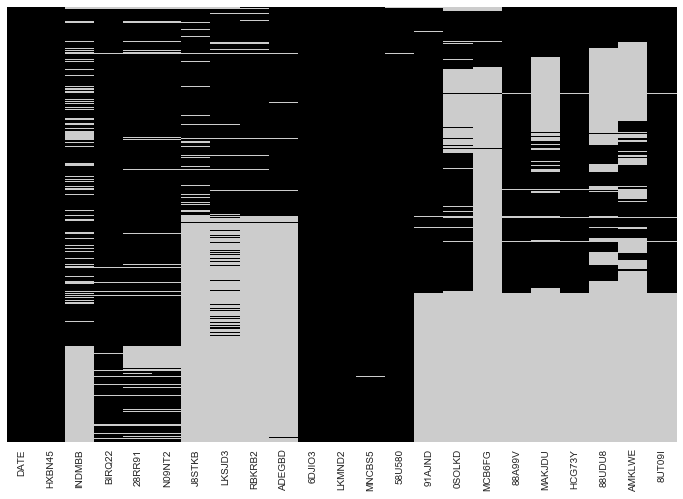

In [254]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cmap='spectral', cbar=False)

# IM-009 Batch Number

In [255]:
#cleanbatch can be applied to the im 009 batch #s too, however there's a 
#notable amount of product batches that use two batches of IM
#so we will create a new column for these values

def cleanimbatch(num):
    if type(num) != float:
        if len(num) > 7:
            num = num[:7]
        else: 
            pass
    return num    

In [256]:
#I believe apply(strip) without the lambda might've worked if I didn't have floats mixed in
df['BIRQ22'] = df['BIRQ22'].apply(lambda x: x.strip() if type(x) != float else x) #remove whitespace from entries w values
df['BIRQ22'] = df['BIRQ22'].apply(cleanimbatch)
df['BIRQ22'] = df['BIRQ22'].replace('', np.nan, regex = True) #replace entries w only '' (nothing) w/ null

df['BIRQ22'].value_counts()

GSC-160    5
AOC-252    4
KMC--48    4
BHC-165    4
AHC-272    4
KHC-191    4
DJC-183    4
CHC-169    4
JMC-251    4
BLC-291    4
AQC-274    4
LQC-167    4
JSC-142    4
FHC-244    4
GNC-371    4
JQC-222    4
HJC-259    4
MNC-430    4
JQC-173    4
KPC-158    4
CQC-180    4
EKC-117    4
LHC-309    3
KNC-328    3
MNC-166    3
LPC-396    3
FRC-114    3
MKC-209    3
DOC-442    3
CHC-118    3
          ..
GSC-263    1
EOC-441    1
MPC-241    1
DRC-408    1
MNC-239    1
HMC-489    1
MMC-276    1
LQC-165    1
ESC-124    1
BLC-319    1
GRC-299    1
DNC-155    1
HKC-256    1
FRC-268    1
MPC-102    1
EJC-280    1
HMC-167    1
GHC-266    1
DRC-411    1
GRC-130    1
JQC-395    1
JHC-195    1
CHC-256    1
HHC-415    1
MGB-172    1
FQC-533    1
BSC-241    1
FPC-376    1
JJC-188    1
HJC-439    1
Name: BIRQ22, Length: 1770, dtype: int64

In [257]:
#pull up values that are strings
df[df['BIRQ22'].apply(type) == str]

,DATE,HXBN45,INDMBB,BIRQ22,28RR91,N09NT2,J8STKB,LKSJD3,RBKRB2,ADEGBD,...,58U580,91AJND,0SOLKD,MCB6FG,88A99V,MAKJDU,HCG73Y,88UDU8,AMKLWE,8UT09I
14,2006-08-18,HGC-214,2006-08-10,HGC-161,55.9,"12,500",500,"6,000",80,"4,500",...,787.5,"52,000",NaN,NaN,58,"60,000",64,62,1/18/2007,48
15,2006-08-16,HGC-215,2006-08-10,HGC-161,55.9,"12,500",NaN,?,?,?,...,692.5,"60,000",NaN,NaN,56,"60,000",55,56,1/16/2007,54
16,2006-08-21,HGC-251,2006-08-18,HGC-181,63.45,"9,200",700,?,88,"9,000",...,657.5,39,NaN,NaN,43,"39,000",41,36,1/21/2007,32
17,2006-08-23,HGC-252,2006-08-21,HGC-244,60.74,"9,500",500,?,88,"7,000",...,587.5,58,NaN,NaN,60,"64,000",55,12/23/2006,1/23/2007,51
18,2006-08-24,HGC-263,2006-08-21,HGC-244,60.74,"9,500",500,?,89,"13,500",...,587.5,72,NaN,NaN,80,"73,000",77,12/24/2006,1/24/2007,67
19,2006-08-28,HGC-264,2006-08-21,HGC-244,60.74,"9,500",500,NaN,88,"6,500",...,587.5,61,NaN,NaN,66,"53,000",54,12/28/2006,1/28/2007,51
20,2006-08-29,HGC-303,2006-08-25,HGC-286,61.09,"13,000",200,"8,500",87,"7,500",...,587.5,60,NaN,NaN,54,"48,000",50,12/29/2006,1/29/2007,45
21,2006-08-31,HGC-304,2006-08-25,HGC-286,61.09,"13,000",250,"9,000",85,"9,000",...,587.5,52,NaN,NaN,56,54,52,12/30/2006,1/30/2007,48
22,2006-09-01,HGC-328,2006-08-28,HGC-300,62.26,"10,800",450,"7,400",84,"8,900",...,587.5,58,NaN,NaN,60,52,57,1/1/2007,2/1/2007,45
23,2006-09-12,HGC-340,2006-09-08,HGC-342,61.04,"14,500",500,"6,800",88,"6,000",...,587.5,48,NaN,NaN,58,60,"56,000",1/12/2007,2/12/2007,52


## IM-009 Solids

In [258]:
#checks for multiple forms of error in the solids column
def cleansolids(pct):
    if type(pct) != float:
        if '/' in pct:
            left_text = pct[:4] #pct.partition(' / ')[0]
            return left_text
        if '-' in pct:
            left_text2 = pct[:4] #pct.partition(' / ')[0]
            return left_text2
    return pct

In [259]:
df['28RR91'] = df['28RR91'].apply(cleansolids)
df['28RR91'].value_counts()

61       133
60.8     118
60.4      90
59.9      88
60.6      87
60.1      86
59.7      85
60.2      85
60.9      84
58.2      84
59.2      83
60.5      76
60.3      74
60        70
59.1      70
59.5      64
61.2      62
58.8      62
59        61
59.8      58
58.9      57
59.6      57
60.7      56
59.3      56
58.5      55
58.6      53
58.4      51
59.4      50
61.4      44
61.1      43
        ... 
61.51      1
61/5       1
60/6       1
           1
63.45      1
63.2       1
57.5       1
62         1
62.24      1
62.26      1
59.27      1
n/a        1
NA/5       1
60.65      1
???        1
60 /       1
62.96      1
60.96      1
60.12      1
60.22      1
62.45      1
 61.       1
63.9       1
58.79      1
62.0       1
61/6       1
58.57      1
64.3       1
60.38      1
61.75      1
Name: 28RR91, Length: 197, dtype: int64

In [260]:
def cleansolids2(pct):
    if type(pct) != float:
        if '/' in pct:
            left_text = 'Drop'
            return left_text
        if '?' in pct:
            left_text = 'Drop'
            return left_text
        if '. ' in pct:
            left_text = 'Drop'
            return left_text
    return pct

In [261]:
def remove_whitespace(x):
    if type(x) != float:
        return x.strip()
    else:
        return x

In [262]:
def cleanpd(x):
    if type(x) != float:
        if len(x) == 3:
            y = x[:2]
            return y
        return x
    return x

In [263]:
#Apply cleaning functions previously defined
df['28RR91'] = df['28RR91'].apply(cleansolids2)
df['28RR91'] = df['28RR91'].apply(cleanpd)
df['28RR91'] = df['28RR91'].apply(remove_whitespace)
#Select nonesense columns and drop them.
df[df['28RR91'] == 'Drop']
df.drop(df[df['28RR91'] == 'Drop'].index, axis=0, inplace=True)

In [264]:
#convert series to numeric type
df['28RR91'] = pd.to_numeric(df['28RR91'], errors='coerce')

## IM 009 VISC

In [265]:
df['N09NT2'].value_counts()

14,000                173
12,000                160
13,000                153
15,000                149
11,000                143
10,000                131
12,500                 72
11,500                 59
13,500                 58
9,000                  55
14,500                 51
14,600                 49
13,200                 47
12,400                 46
11,400                 43
10,600                 41
13,600                 40
12,600                 40
16,000                 39
11,600                 38
10,400                 36
10,500                 35
11,800                 35
12,800                 35
13,800                 35
14,400                 35
12,200                 33
8,000                  32
17,000                 32
14,800                 31
                     ... 
11,500 / 12,000         1
12,400/13,000           1
10,000 / 13,400         1
15,000/11,800           1
13,400/15,700           1
16,000 / 15,000         1
11,400 /13,000          1
9,200 / 9,60

In [266]:
df['N09NT2'] = df['N09NT2'].apply(lambda x: x.strip() if type(x) != float else x)

In [267]:
#remove any unneeded punctuation, entries with question marks typically did not have any information
#so I replaced those with NaN
def removeit(vis):
    
    if type(vis) != float:
        
        if '.' in vis:
            rep = vis.replace('.','')
            return rep
        
        elif ',' in vis:
            rep = vis.replace(',','')
            return rep
        
        elif '?' in vis:
            rep = np.nan
            return rep
        
        return vis
    
    return vis        


In [268]:
#Ocassionally two values were taken for this column
#With domain knowledge I was able to determine that the first value was
#the important one
def space_imvisc(vis):
    
    if type(vis) != float:
        
        if '/' in vis:
            vis.replace(' ','')
            left_text = vis.partition('/')[0] #0 is left of partition, 1 is partition key, 2 is right of partition assuming there's one partition only
            return left_text
        
        elif '-' in vis:
            vis.replace(' ','')
            left_text2 = vis.partition('-')[0]
            return left_text2
        
        return vis
    
    return vis

In [269]:
df['N09NT2'] = df['N09NT2'].apply(removeit)
df['N09NT2'] = df['N09NT2'].apply(space_imvisc)

In [270]:
#view results
df['N09NT2']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14      12500
15      12500
16       9200
17       9500
18       9500
19       9500
20      13000
21      13000
22      10800
23      14500
24      14500
25       9400
26       9400
27         13
28         13
29         92
        ...  
3404    13000
3405    14700
3406      NaN
3407    14300
3408    15200
3409    15200
3410    15200
3411    12000
3412    13500
3413    14300
3414    12500
3415    12500
3416    12800
3417      NaN
3418    15300
3419    13000
3420    15300
3421    13000
3422    10000
3423    15700
3424    13400
3425      NaN
3426      NaN
3427    10000
3428    10000
3429    13400
3430    13400
3431    13400
3432    15200
3433      NaN
Name: N09NT2, Length: 3306, dtype: object

In [271]:
#convert series to numeric type
df['N09NT2'] = pd.to_numeric(df['N09NT2'], errors='coerce')
df['N09NT2'].apply(type).value_counts()

<class 'float'>    3306
Name: N09NT2, dtype: int64

In [272]:
df.head()

,DATE,HXBN45,INDMBB,BIRQ22,28RR91,N09NT2,J8STKB,LKSJD3,RBKRB2,ADEGBD,...,58U580,91AJND,0SOLKD,MCB6FG,88A99V,MAKJDU,HCG73Y,88UDU8,AMKLWE,8UT09I
0,2006-07-19,GGC-151,NaT,NaN,NaN,NaN,NaN,NaN,90,"9,500",...,700,NaN,NaN,NaN,"35,000","37,000","38,000",36,36,1/19/2007
1,2006-07-20,GGC-152,NaT,NaN,NaN,NaN,NaN,NaN,90,"8,800",...,700,NaN,NaN,NaN,"56,000","56,000","50,000",56,48,1/20/2007
2,2006-07-20,GGC-182,NaT,NaN,NaN,NaN,NaN,NaN,90,"8,000",...,NaN,NaN,NaN,NaN,"46,000","46,000","43,000",45,40,1/20/2007
3,2006-07-21,GGC-202,NaT,NaN,NaN,NaN,NaN,NaN,90,"12,500",...,700,NaN,NaN,NaN,"50,000",54,"50,000",52,50,1/21/2007
4,2006-07-31,GGC-262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,"7,000",...,587.5,"62,000 (2 weeks)",NaN,NaN,65,59,60,54,12/31/2006,1/31/2007


## IM-050 Visc

In [273]:
#strip whitespace
df['J8STKB'] = df['J8STKB'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['J8STKB'] = df['J8STKB'].apply(removeit)
#remove spaces, not whitespace
df['J8STKB'] = df['J8STKB'].apply(space_imvisc)
#convert series to numeric type
df['J8STKB'] = pd.to_numeric(df['J8STKB'], errors='coerce')
df['J8STKB'].apply(type).value_counts()

<class 'float'>    3306
Name: J8STKB, dtype: int64

In [274]:
#view cleaned data
df['J8STKB'].value_counts()

500.0     396
600.0     205
400.0     164
300.0     117
450.0     113
550.0      99
350.0      76
700.0      49
250.0      29
650.0      23
800.0      19
200.0      17
750.0      15
1000.0      7
1300.0      6
900.0       5
1500.0      3
1100.0      2
1400.0      2
850.0       2
1200.0      2
150.0       1
1090.0      1
475.0       1
1150.0      1
480.0       1
960.0       1
950.0       1
1250.0      1
1700.0      1
Name: J8STKB, dtype: int64

# 009-050 Combined Visc.# 009-050 Combined Visc.

In [275]:
#strip whitespace
df['LKSJD3'] = df['LKSJD3'].apply(lambda x: x.strip() if type(x) != float else x)
#strip whitespace
df['LKSJD3'] = df['LKSJD3'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['LKSJD3'] = df['LKSJD3'].apply(removeit)
#remove spaces, not whitespace
df['LKSJD3'] = df['LKSJD3'].apply(space_imvisc)
#convert series to numeric type
df['LKSJD3'] = pd.to_numeric(df['LKSJD3'], errors='coerce')
df['LKSJD3'].apply(type).value_counts()

<class 'float'>    3306
Name: LKSJD3, dtype: int64

In [276]:
df['LKSJD3'].value_counts()

9000.0     78
10000.0    67
8000.0     51
9200.0     48
8400.0     45
7000.0     44
8200.0     39
7800.0     38
7200.0     37
9400.0     37
8600.0     36
8800.0     35
9600.0     35
11000.0    35
7400.0     33
10200.0    33
7600.0     32
9800.0     30
10600.0    29
6400.0     29
6600.0     29
12000.0    28
11200.0    27
6000.0     25
6800.0     24
13000.0    24
10800.0    21
11400.0    21
14000.0    18
10400.0    18
           ..
10700.0     2
68000.0     1
10900.0     1
6300.0      1
18800.0     1
9350.0      1
21000.0     1
10100.0     1
5300.0      1
11900.0     1
13500.0     1
25000.0     1
3600.0      1
9450.0      1
15800.0     1
8750.0      1
18500.0     1
19000.0     1
3700.0      1
40000.0     1
7100.0      1
14800.0     1
6250.0      1
5700.0      1
30000.0     1
10340.0     1
73.0        1
5500.0      1
14300.0     1
9300.0      1
Name: LKSJD3, Length: 126, dtype: int64

## Prev. + 032 Combined Visc.

In [277]:
#strip whitespace
df['ADEGBD'] = df['ADEGBD'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['ADEGBD'] = df['ADEGBD'].apply(removeit)
#remove spaces, not whitespace
df['ADEGBD'] = df['ADEGBD'].apply(space_imvisc)
#convert series to numeric type
df['ADEGBD'] = pd.to_numeric(df['ADEGBD'], errors='coerce')
df['ADEGBD'].apply(type).value_counts()

<class 'float'>    3306
Name: ADEGBD, dtype: int64

In [278]:
df.head()

,DATE,HXBN45,INDMBB,BIRQ22,28RR91,N09NT2,J8STKB,LKSJD3,RBKRB2,ADEGBD,...,58U580,91AJND,0SOLKD,MCB6FG,88A99V,MAKJDU,HCG73Y,88UDU8,AMKLWE,8UT09I
0,2006-07-19,GGC-151,NaT,NaN,NaN,NaN,NaN,NaN,90,9500.0,...,700,NaN,NaN,NaN,"35,000","37,000","38,000",36,36,1/19/2007
1,2006-07-20,GGC-152,NaT,NaN,NaN,NaN,NaN,NaN,90,8800.0,...,700,NaN,NaN,NaN,"56,000","56,000","50,000",56,48,1/20/2007
2,2006-07-20,GGC-182,NaT,NaN,NaN,NaN,NaN,NaN,90,8000.0,...,NaN,NaN,NaN,NaN,"46,000","46,000","43,000",45,40,1/20/2007
3,2006-07-21,GGC-202,NaT,NaN,NaN,NaN,NaN,NaN,90,12500.0,...,700,NaN,NaN,NaN,"50,000",54,"50,000",52,50,1/21/2007
4,2006-07-31,GGC-262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,...,587.5,"62,000 (2 weeks)",NaN,NaN,65,59,60,54,12/31/2006,1/31/2007


# Temperature

In [279]:
df[df['RBKRB2'].apply(type) != float]['RBKRB2'].value_counts()

70              114
80              110
66               77
72               76
84               75
68               72
82               69
88               67
78               65
74               62
76               60
86               58
75               48
64               47
62               46
85               44
73               44
67               42
71               38
65               32
90               30
60               24
83               23
63               23
89               19
81               19
69               18
87               18
79               16
77               13
61               11
58               10
59                6
57                4
56                3
       N/A        1
         N/A      1
?                 1
94                1
Name: RBKRB2, dtype: int64

In [280]:
def remove_temp(temp):
    
    if type(temp) == str:
        
        if '/' in temp:
            new = 'Drop'
            return new
        
        if '?' in temp:
            new = 'Drop'
            return new
        
    return temp

In [281]:
#replace deviant entries with "Drop" and drop all rows that contain "Drop"
df['RBKRB2'] = df['RBKRB2'].apply(remove_temp)
df.drop(df[df['RBKRB2'] == 'Drop'].index, inplace=True)

In [282]:
#String to numeric values
df['RBKRB2'] = pd.to_numeric(df['RBKRB2'], errors='coerce')
df['RBKRB2'].apply(type).value_counts()

<class 'float'>    3303
Name: RBKRB2, dtype: int64

## Final Visc

In [284]:
#strip whitespace
df['6DJIO3'] = df['6DJIO3'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['6DJIO3'] = df['6DJIO3'].apply(removeit)
#remove spaces, not whitespace
df['6DJIO3'] = df['6DJIO3'].apply(space_imvisc)
#convert series to numeric type
df['6DJIO3'] = pd.to_numeric(df['6DJIO3'], errors='coerce')
df['6DJIO3'].apply(type).value_counts()

<class 'float'>    3303
Name: 6DJIO3, dtype: int64

## pH

In [285]:
#strip whitespace
df['LKMND2'] = df['LKMND2'].apply(lambda x: x.strip() if type(x) != float else x)
#replace entries w only '' (nothing) w/ null
df['LKMND2'] = df['LKMND2'].replace('', np.nan, regex = True)
#replace entries of only whitespace w/ null
df['LKMND2'] = df['LKMND2'].replace(r'\s+', np.nan, regex = True)

In [286]:
#convert series to numeric type
df['LKMND2'] = pd.to_numeric(df['LKMND2'], errors='coerce')
df['LKMND2'].apply(type).value_counts()

<class 'float'>    3303
Name: LKMND2, dtype: int64

## 6200 Solids

In [287]:
df['MNCBS5'].apply(type).value_counts()
df['MNCBS5'].value_counts()

53.5    153
53.8    145
53.2    143
53.0    141
53.6    132
53.4    123
54.0    119
53.3    106
53.7    105
53.1    103
52.8    102
54.1    100
54.2     96
53.9     90
52.6     88
52.9     86
54.4     83
54.3     82
52.7     80
52.2     76
54.5     73
52.4     73
52.5     70
52.3     69
54.6     64
52.0     57
54.7     54
54.8     52
52.1     49
55.2     38
       ... 
59.7      3
57.0      3
56.7      3
56.6      3
50.8      2
59.1      2
59.2      2
49.6      1
49.4      1
57.4      1
61.8      1
63.0      1
50.5      1
60.0      1
50.0      1
58.0      1
56.9      1
79.2      1
50.2      1
82.6      1
80.6      1
49.5      1
59.3      1
56.8      1
57.2      1
42.9      1
58.7      1
58.5      1
59.6      1
57.1      1
Name: MNCBS5, Length: 87, dtype: int64

## IM-019 Added

In [288]:
df['58U580'].apply(type).value_counts()
df[df['58U580'].apply(type) == float]

,DATE,HXBN45,INDMBB,BIRQ22,28RR91,N09NT2,J8STKB,LKSJD3,RBKRB2,ADEGBD,...,58U580,91AJND,0SOLKD,MCB6FG,88A99V,MAKJDU,HCG73Y,88UDU8,AMKLWE,8UT09I
2,2006-07-20,GGC-182,NaT,NaN,NaN,NaN,NaN,NaN,90.0,8000.0,...,NaN,NaN,NaN,NaN,"46,000","46,000","43,000",45,40,1/20/2007
400,2007-08-08,HHC-143,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,58,8/22/2007,57,9/8/2007,56,52,NaN,NaN,52
414,2007-08-17,HHC-216,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,70,72,9/7/2007,72,65,68,NaN,NaN,82
483,2007-09-27,JHC-307,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,58,58,57,54,NaN,53,NaN,NaN,52
951,2008-12-30,MJC-306,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"48,000@72","41,000@77",1/22/2009,"48,000@70",3/1/2009,3/30/2009,4/30/2009,5/30/2009,6/30/2009
1125,2009-10-08,KKC133/,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,51,NaN,NaN,43,AT- 65 *F,1/8/2010,NaN,NaN,4/8/2010
1218,2010-03-15,CLC-201,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,53,@ 72 *F,NaN,43,AT-72 *F,36,@ 80 *F,@ 78 *F,42
1220,2010-03-19,CLC-244,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,72,@ 69 *F,NaN,63,AT-72 *F,54,@ 80 *F,@ 78 *F,47
1230,2010-04-05,DLC-197,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4/12/2010,NO SAMPLES,NaN,NaN,NaN,NaN,NaN,NaN,N/S
1273,2010-05-20,ELC-390,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,49,@ 78 *F,NaN,NaN,NaN,46,@ 74 *F,NaN,44


In [289]:
df['58U580'].value_counts()

571 lb IM-019                   868
572                             776
571lb IM-019                    410
571                             311
721 lb IM-019                    86
571lb  IM-019                    75
571 lb IM-227                    68
722                              66
450                              57
550 lb 6038A                     51
672                              46
500                              45
500 lb 6038A                     44
721                              43
772                              33
400                              33
300 lb IM-019                    24
587.5                            20
350 lb IM-019                    15
400 lb IM-019                    15
671                              13
671 lb IM-019                     8
450 lb IM-019                     8
571* lb IM-227*                   8
822                               7
572+150#OF6038                    6
330 lb IM-019                     6
622                         

In [290]:
#if str, slice the weight of 
def clean_thick(thk):
    if type(thk) == str:
        if len(thk) > 3:
            wt = thk[:3]
            return wt
        return thk
    return thk

In [291]:
df['58U580'] = df['58U580'].apply(clean_thick)
df['58U580'] = pd.to_numeric(df['58U580'], errors='coerce')

In [292]:
#check
df['58U580'].value_counts()
df['58U580'].apply(type).value_counts()

<class 'float'>    3303
Name: 58U580, dtype: int64

# Viscosity on Aging (Week 1)

In [297]:
#replace dates that were placeholders with null
def replace_date(date):
    if type(date) == str:
        if '/' in date:
            date = np.nan
            return date
        return date
    return date

In [298]:
def check_start(num):
    if type(num) == str:
        #use regular expression to check if the beginning of num is a number 0-9
        #re.match returns 1 if true, and None if false, so if it doesn't begin with a number
        #replace values with null
        if (re.match(r'^\d', num) == None): 
            new = np.nan
            return new
        return num
    return num

In [299]:
def remove_extra(num):
    if type(num) == str:
        
        if len(num) > 6:
            new = np.nan
            return new
        
        if len(num) == 2:
            new = np.nan
            return new
        
        return num
    return num

In [300]:
df['91AJND'].isnull().value_counts()

True     3208
False      95
Name: 91AJND, dtype: int64

In [301]:
def scale_up(num):
    
    if type(num) == float:
        
        if num < 10000:
            num = num*10
            return num
    
    return num

In [304]:
#remove dates
df['91AJND'] = df['91AJND'].apply(replace_date)
#remove incorrect values
df['91AJND'] = df['91AJND'].apply(remove_extra)
#strip whitespace
df['91AJND'] = df['91AJND'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['91AJND'] = df['91AJND'].apply(removeit)
#remove spaces, not whitespace
df['91AJND'] = df['91AJND'].apply(space_imvisc)
#df['1 WEEK VISC'].value_counts()
#convert series to numeric type
#remove spaces, not whitespace
df['91AJND'] = pd.to_numeric(df['91AJND'], errors='coerce')
#df['1 WEEK VISC'].apply(type).value_counts()

In [305]:
#scale up incorrect entries by 1 magnitude (num*10)
df['91AJND'] = df['91AJND'].apply(scale_up)

# Viscosity on Aging (2 Weeks)

In [306]:
#remove dates
df['0SOLKD'] = df['0SOLKD'].apply(replace_date)
#remove incorrect values
df['0SOLKD'] = df['0SOLKD'].apply(remove_extra)
#strip whitespace
df['0SOLKD'] = df['0SOLKD'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['0SOLKD'] = df['0SOLKD'].apply(removeit)
#remove spaces, not whitespace
df['0SOLKD'] = df['0SOLKD'].apply(space_imvisc)
#df['1 WEEK VISC'].value_counts()
#convert series to numeric type
df['0SOLKD'] = pd.to_numeric(df['0SOLKD'], errors='coerce')
#df['1 WEEK VISC'].apply(type).value_counts()
#scale up incorrect entries by 1 magnitude (num*10)
df['0SOLKD'] = df['0SOLKD'].apply(scale_up)

# Viscosity on Aging (3 Weeks)

In [307]:
#remove dates
df['MCB6FG'] = df['MCB6FG'].apply(replace_date)
#remove incorrect values
df['MCB6FG'] = df['MCB6FG'].apply(remove_extra)
#strip whitespace
df['MCB6FG'] = df['MCB6FG'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['MCB6FG'] = df['MCB6FG'].apply(removeit)
#remove spaces, not whitespace
df['MCB6FG'] = df['MCB6FG'].apply(space_imvisc)
#df['1 WEEK VISC'].value_counts()
#convert series to numeric type
df['MCB6FG'] = pd.to_numeric(df['MCB6FG'], errors='coerce')
#df['1 WEEK VISC'].apply(type).value_counts()
#scale up incorrect entries by 1 magnitude (num*10)
df['MCB6FG'] = df['MCB6FG'].apply(scale_up)

# Viscosity on Aging (1 Month)

In [308]:
#remove dates
df['88A99V'] = df['88A99V'].apply(replace_date)
#remove incorrect values
df['88A99V'] = df['88A99V'].apply(remove_extra)
#strip whitespace
df['88A99V'] = df['88A99V'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['88A99V'] = df['88A99V'].apply(removeit)
#remove spaces, not whitespace
df['88A99V'] = df['88A99V'].apply(space_imvisc)
#df['1 WEEK VISC'].value_counts()
#convert series to numeric type
df['88A99V'] = pd.to_numeric(df['88A99V'], errors='coerce')
#df['1 WEEK VISC'].apply(type).value_counts()
#scale up incorrect entries by 1 magnitude (num*10)
df['88A99V'] = df['88A99V'].apply(scale_up)

# Viscosity on Aging (2 Month)

In [310]:
#remove dates
df['MAKJDU'] = df['MAKJDU'].apply(replace_date)
#remove incorrect values
df['MAKJDU'] = df['MAKJDU'].apply(remove_extra)
#strip whitespace
df['MAKJDU'] = df['MAKJDU'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['MAKJDU'] = df['MAKJDU'].apply(removeit)
#remove spaces, not whitespace
df['MAKJDU'] = df['MAKJDU'].apply(space_imvisc)
#df['1 WEEK VISC'].value_counts()
#convert series to numeric type
df['MAKJDU'] = pd.to_numeric(df['MAKJDU'], errors='coerce')
#df['1 WEEK VISC'].apply(type).value_counts()
#scale up incorrect entries by 1 magnitude (num*10)
df['MAKJDU'] = df['MAKJDU'].apply(scale_up)

# Viscosity on Aging (3 Month)

In [314]:
#remove dates
df['HCG73Y'] = df['HCG73Y'].apply(replace_date)
#remove incorrect values
df['HCG73Y'] = df['HCG73Y'].apply(remove_extra)
#strip whitespace
df['HCG73Y'] = df['HCG73Y'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['HCG73Y'] = df['HCG73Y'].apply(removeit)
#remove spaces, not whitespace
df['HCG73Y'] = df['HCG73Y'].apply(space_imvisc)
#df['1 WEEK VISC'].value_counts()
#convert series to numeric type
df['HCG73Y'] = pd.to_numeric(df['HCG73Y'], errors='coerce')
#df['1 WEEK VISC'].apply(type).value_counts()
#scale up incorrect entries by 1 magnitude (num*10)
df['HCG73Y'] = df['HCG73Y'].apply(scale_up)

# Viscosity on Aging (4 Month)

In [315]:
#remove dates
df['88UDU8'] = df['88UDU8'].apply(replace_date)
#remove incorrect values
df['88UDU8'] = df['88UDU8'].apply(remove_extra)
#strip whitespace
df['88UDU8'] = df['88UDU8'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['88UDU8'] = df['88UDU8'].apply(removeit)
#remove spaces, not whitespace
df['88UDU8'] = df['88UDU8'].apply(space_imvisc)
#df['1 WEEK VISC'].value_counts()
#convert series to numeric type
df['88UDU8'] = pd.to_numeric(df['88UDU8'], errors='coerce')
#df['1 WEEK VISC'].apply(type).value_counts()
#scale up incorrect entries by 1 magnitude (num*10)
df['88UDU8'] = df['88UDU8'].apply(scale_up)

# Viscosity on Aging (5 Month)

In [316]:
#remove dates
df['AMKLWE'] = df['AMKLWE'].apply(replace_date)
#remove incorrect values
df['AMKLWE'] = df['AMKLWE'].apply(remove_extra)
#strip whitespace
df['AMKLWE'] = df['AMKLWE'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['AMKLWE'] = df['AMKLWE'].apply(removeit)
#remove spaces, not whitespace
df['AMKLWE'] = df['AMKLWE'].apply(space_imvisc)
#df['1 WEEK VISC'].value_counts()
#convert series to numeric type
df['AMKLWE'] = pd.to_numeric(df['AMKLWE'], errors='coerce')
#df['1 WEEK VISC'].apply(type).value_counts()
#scale up incorrect entries by 1 magnitude (num*10)
df['AMKLWE'] = df['AMKLWE'].apply(scale_up)

## Viscosity on Aging (6 Month)

In [317]:
#remove dates
df['8UT09I'] = df['8UT09I'].apply(replace_date)
#remove incorrect values
df['8UT09I'] = df['8UT09I'].apply(remove_extra)
#strip whitespace
df['8UT09I'] = df['8UT09I'].apply(lambda x: x.strip() if type(x) != float else x)
#remove punc
df['8UT09I'] = df['8UT09I'].apply(removeit)
#remove spaces, not whitespace
df['8UT09I'] = df['8UT09I'].apply(space_imvisc)
#df['1 WEEK VISC'].value_counts()
#convert series to numeric type
df['8UT09I'] = pd.to_numeric(df['8UT09I'], errors='coerce')
#df['1 WEEK VISC'].apply(type).value_counts()
#scale up incorrect entries by 1 magnitude (num*10)
df['8UT09I'] = df['8UT09I'].apply(scale_up)

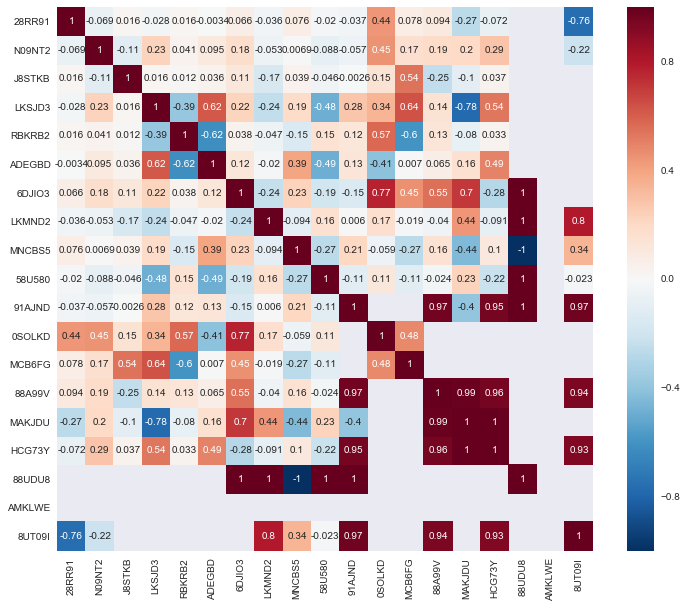

In [318]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

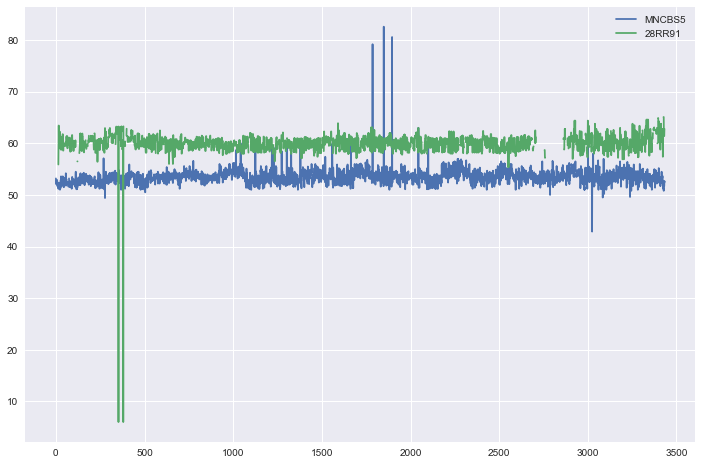

In [319]:
plt.figure(figsize=(12,8))
plt.plot(df['MNCBS5'], label='MNCBS5')
plt.plot(df['28RR91'], label='28RR91')

plt.legend()

# Cleaning and Joining Manufacturing Data

In [320]:
manu = pd.read_csv('6200 MANUF DATA.csv')

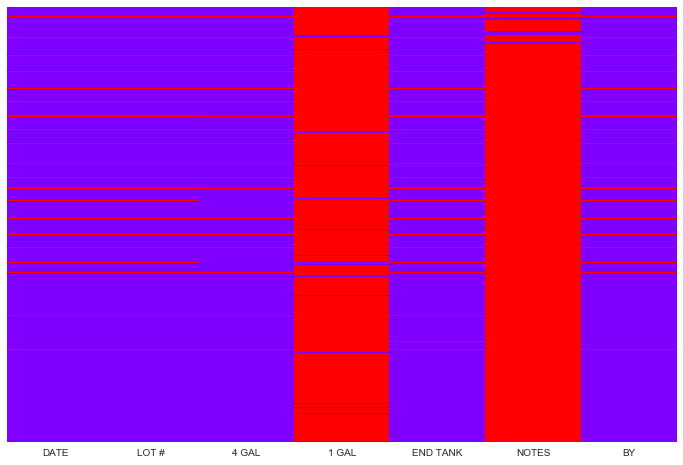

In [321]:
plt.figure(figsize=(12,8))
sns.heatmap(manu.isnull(), yticklabels=False, cbar=False, cmap='rainbow')

In [322]:
#drop the rows where the lot # and end tank columns have null values by using their index
#we DO NOT drop the 1 Gal column because it's not trivial, sometimes we produce 1 gal, other times its 4 gal.
manu.drop(manu[manu['LOT #'].isnull()].index, inplace=True)
manu.drop(manu[manu['END TANK'].isnull()].index, inplace=True)
manu.drop(['NOTES', 'DATE'], axis=1, inplace=True)

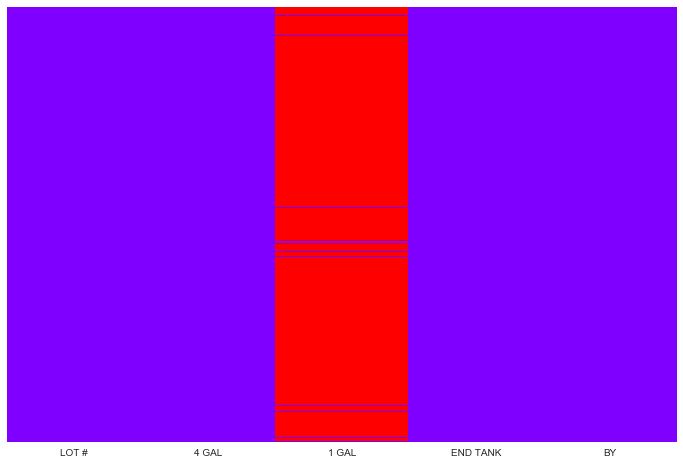

In [323]:
plt.figure(figsize=(12,8))
sns.heatmap(manu.isnull(), yticklabels=False, cbar=False, cmap='rainbow')

# Cleaning Lot Num

In [324]:
#rename column name to join with QC later
manu=manu.rename(columns = {'LOT #': 'HXBN45'})

In [326]:
manu['HXBN45'].value_counts()

AQC-359    2
FQC-593    2
DRC-470    1
HSC-182    1
DSC-436    1
DRC-281    1
LQC-206    1
FQC-513    1
FSC-207    1
EQC-179    1
DQC-246    1
FQC-373    1
MRC-412    1
FQC-625    1
ERC-341    1
MRC-415    1
DRC-296    1
JRC-402    1
JSC-263    1
KQC-497    1
CSC-426    1
FRC-102    1
ESC-496    1
DQC-124    1
BSC-382    1
HRC-487    1
HSC-147    1
HQC-152    1
GQC-239    1
HQC-149    1
          ..
MQC-166    1
EQC-574    1
LQC-335    1
CRC-445    1
ESC-467    1
HRC-522    1
JQC-501    1
KQC-495    1
CQC-460    1
BSC-366    1
HRC-352    1
MRC-252    1
AQC-438    1
DSC-143    1
MRC-194    1
GSC-378    1
HSC-307    1
KQC-444    1
DQC-140    1
BSC-144    1
BSC-381    1
DSC-434    1
JRC-128    1
LRC-217    1
EQC-178    1
HSC-466    1
LQC-337    1
GRC-419    1
CQC-109    1
GSC-193    1
Name: HXBN45, Length: 900, dtype: int64

In [329]:
#drop the rows where the batch number has a duplicate by using their index values
manu.drop(manu[manu['HXBN45'] == 'BRC-142'].index, inplace=True)
manu.drop(manu[manu['HXBN45'] == 'AQC-359'].index, inplace=True)
manu.drop(manu[manu['HXBN45'] == 'FQC-593'].index, inplace=True)

In [330]:
manu['HXBN45'].value_counts()

DRC-470    1
HRC-312    1
DSC-436    1
DRC-281    1
LQC-206    1
FQC-513    1
FSC-207    1
EQC-179    1
DQC-246    1
FQC-373    1
MRC-412    1
FQC-625    1
ERC-341    1
HSC-182    1
MRC-415    1
JRC-402    1
JSC-263    1
KQC-497    1
CSC-426    1
FRC-102    1
ESC-496    1
DQC-124    1
BSC-382    1
HRC-487    1
HSC-147    1
HQC-152    1
FSC-399    1
GQC-239    1
DRC-296    1
GRC-453    1
          ..
HRC-354    1
EQC-574    1
LQC-335    1
MQC-167    1
GSC-378    1
CRC-445    1
HRC-522    1
JQC-501    1
KQC-495    1
CQC-460    1
BSC-366    1
HRC-352    1
MRC-252    1
AQC-438    1
DSC-143    1
MRC-194    1
ESC-467    1
KQC-444    1
HSC-307    1
DQC-140    1
BSC-144    1
BSC-381    1
JRC-128    1
LRC-217    1
EQC-178    1
HSC-466    1
LQC-337    1
GRC-419    1
CQC-109    1
GSC-193    1
Name: HXBN45, Length: 897, dtype: int64

In [331]:
#trim any batch numbers longer than 7 length
manu['HXBN45'] = manu['HXBN45'].apply(cleanbatch)

# Cleaning 1&4 Gal

In [332]:
manu['4 GAL'].value_counts()

208.0    51
201.0    49
210.0    44
216.0    44
204.0    44
203.0    43
209.0    42
202.0    41
200.0    38
205.0    36
206.0    36
211.0    35
199.0    33
207.0    29
212.0    28
197.0    23
213.0    20
214.0    15
217.0    14
220.0    14
215.0    14
222.0    13
224.0    12
218.0    10
198.0    10
195.0     9
219.0     8
223.0     8
194.0     8
196.0     8
         ..
178.0     1
188.0     1
175.0     1
173.0     1
153.0     1
185.0     1
179.0     1
235.0     1
141.0     1
165.0     1
167.0     1
147.0     1
187.0     1
246.0     1
156.0     1
236.0     1
172.0     1
136.0     1
174.0     1
84.0      1
242.0     1
234.0     1
154.0     1
123.0     1
251.0     1
182.0     1
170.0     1
168.0     1
144.0     1
184.0     1
Name: 4 GAL, Length: 84, dtype: int64

In [333]:
manu['1 GAL'].value_counts()

120.0    10
240.0     2
200.0     2
525.0     1
40.0      1
48.0      1
112.0     1
60.0      1
156.0     1
68.0      1
121.0     1
197.0     1
220.0     1
140.0     1
160.0     1
100.0     1
28.0      1
165.0     1
139.0     1
62.0      1
Name: 1 GAL, dtype: int64

Seems like 1 and 4 gal columns are fine.

# Cleaning End Tank

In [334]:
manu['END TANK'].apply(type).value_counts()

<class 'float'>    897
Name: END TANK, dtype: int64

In [335]:
manu['END TANK'].value_counts()

8.0    480
9.0    283
7.0     71
6.0     63
Name: END TANK, dtype: int64

# Cleaning "By"

In [336]:
manu['BY'].apply(type).value_counts()

<class 'str'>    897
Name: BY, dtype: int64

In [337]:
manu['BY'].value_counts()

Teo          156
DAVE         153
Dave          98
LESTER        63
David         59
dave          55
RARMUNDO      53
MEL           46
RICKY         36
NICK          27
HINTON        27
Danny         25
Hinton        18
Nick          17
Kareem        14
jr             9
Josue          9
Htownes        8
DONALD         4
NATE           3
Sebastian      2
Jose           2
Mel            2
RARDAVID       1
WILLIE         1
DAVID          1
TEO            1
Ricky          1
AVELINO        1
SKYLER         1
RT             1
Townes         1
Marcus         1
Rahmel         1
Name: BY, dtype: int64

In [338]:
manu['BY'] = manu['BY'].apply(lambda name: name.upper())

In [339]:
# Pass in dictionary to replace names
manu['BY'].replace({'HTOWNES': 'HAROLD', 'TOWNES': 'HAROLD'}, inplace=True)
manu['BY'].replace({'RARDAVID': 'DAVID'}, inplace=True)

In [340]:
manu['BY'].value_counts()

DAVE         306
TEO          157
LESTER        63
DAVID         61
RARMUNDO      53
MEL           48
HINTON        45
NICK          44
RICKY         37
DANNY         25
KAREEM        14
JR             9
HAROLD         9
JOSUE          9
DONALD         4
NATE           3
JOSE           2
SEBASTIAN      2
AVELINO        1
RAHMEL         1
RT             1
SKYLER         1
MARCUS         1
WILLIE         1
Name: BY, dtype: int64

# Joining with QC Data

In [342]:
#left join QC and manufacturing tables using Batch # as the primary key
newdata = pd.merge(left=df, right=manu, how='left', on=['HXBN45'])

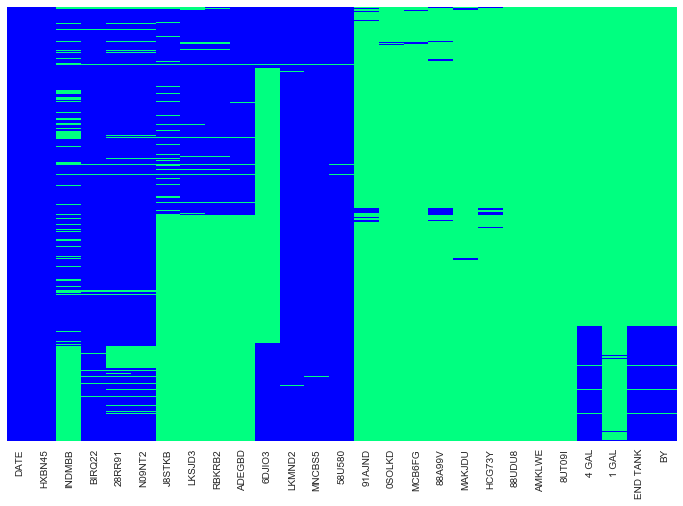

In [343]:
plt.figure(figsize=(12,8))
sns.heatmap(newdata.isnull(), yticklabels=False, cbar=False, cmap='winter')

# Data Exploration

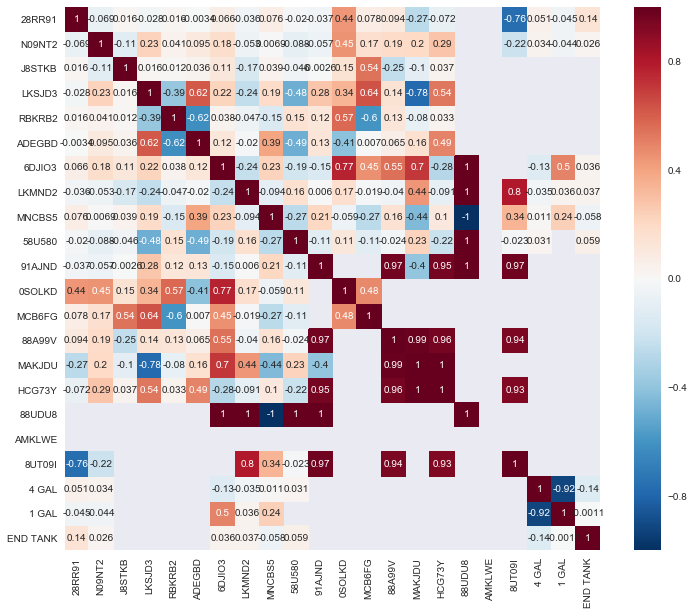

In [344]:
plt.figure(figsize=(12,10))
sns.heatmap(newdata.corr(), annot=True)

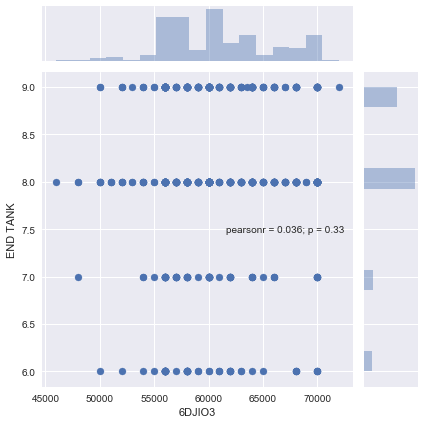

In [345]:
sns.jointplot(data=newdata, x='6DJIO3', y='END TANK')

In [346]:
newdata['YEAR'] = newdata['DATE'].apply(lambda time: time.year)

In [349]:
newdata[newdata['YEAR']==2017]['6DJIO3']

2886    60000.0
3106    62000.0
3107    48000.0
3108    57000.0
3109    56000.0
3110    50000.0
3111    58000.0
3112    56000.0
3113    48000.0
3114    56000.0
3115    60000.0
3116    57000.0
3117    46000.0
3118    56000.0
3119    56000.0
3120    56000.0
3121    56000.0
3122    58000.0
3123    59000.0
3124    60000.0
3125    59000.0
3126    58000.0
3127    64000.0
3128    64000.0
3129    58000.0
3130    61000.0
3131    67000.0
3132    61000.0
3133    56000.0
3134    65000.0
         ...   
3273    59000.0
3274    56000.0
3275    63000.0
3276    59000.0
3277    59000.0
3278    59000.0
3279    56000.0
3280    57000.0
3281    60000.0
3282    60000.0
3283    66000.0
3284    65000.0
3285    61000.0
3286    58000.0
3287    59000.0
3288    70000.0
3289    62000.0
3290    70000.0
3291    59000.0
3292    58000.0
3293    62000.0
3294    61000.0
3295    56000.0
3296    56000.0
3297    59000.0
3298    55000.0
3299    57000.0
3300    56000.0
3301    60000.0
3302    68000.0
Name: 6DJIO3, Length: 19

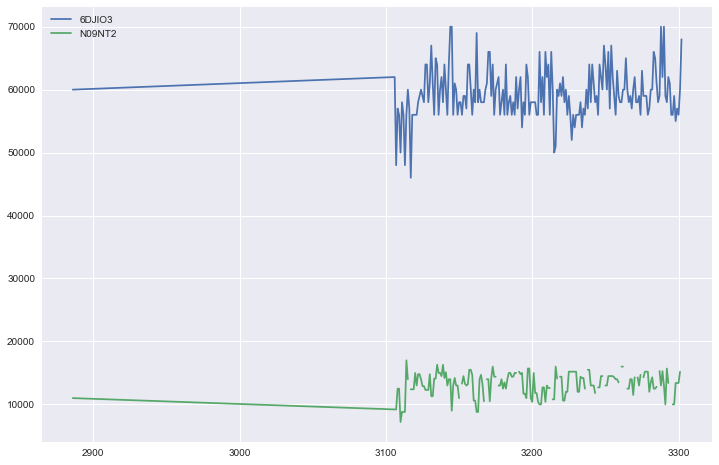

In [350]:
plt.figure(figsize=(12,8))
plt.plot(newdata[newdata['YEAR'] == 2017]['6DJIO3'], label='6DJIO3')
plt.plot(newdata[newdata['YEAR'] == 2017]['N09NT2'], label='N09NT2')

plt.legend()

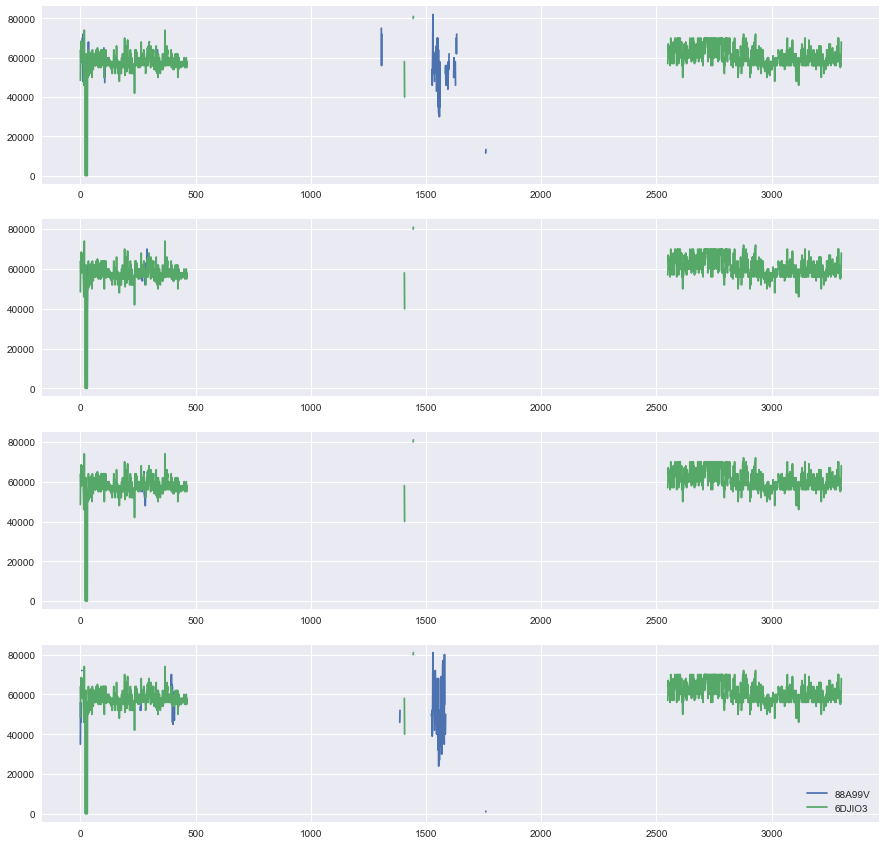

In [351]:
fig = plt.figure(figsize=(15,15))
axes1 = fig.add_subplot(411)
axes2 = fig.add_subplot(412)
axes3 = fig.add_subplot(413)
axes4 = fig.add_subplot(414)

plt.sca(axes1) #set axis instance
plt.plot(newdata['91AJND'],  label='91AJND')
plt.plot(newdata['6DJIO3'],  label='6DJIO3')

plt.sca(axes2)
plt.plot(newdata['0SOLKD'],  label='0SOLKD')
plt.plot(newdata['6DJIO3'],  label='6DJIO3')

plt.sca(axes3)
plt.plot(newdata['MCB6FG'],  label='MCB6FG')
plt.plot(newdata['6DJIO3'],  label='6DJIO3')

plt.sca(axes4)
plt.plot(newdata['88A99V'], label='88A99V')
plt.plot(newdata['6DJIO3'],  label='6DJIO3')


plt.legend()

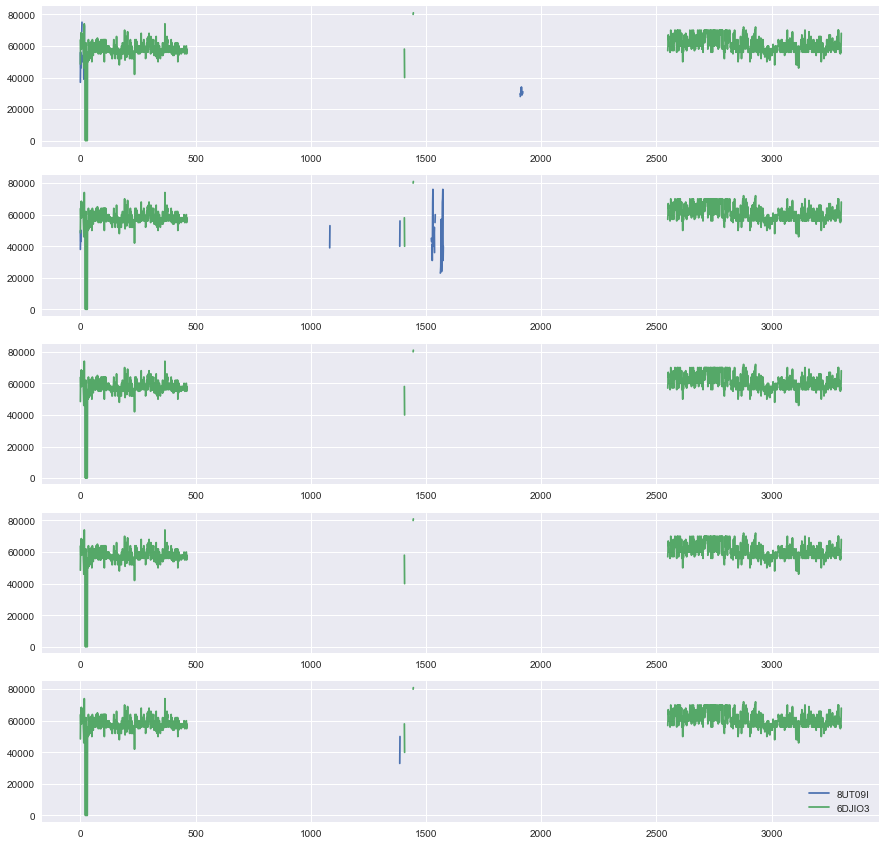

In [353]:
fig = plt.figure(figsize=(15,15))
axes1 = fig.add_subplot(511)
axes2 = fig.add_subplot(512)
axes3 = fig.add_subplot(513)
axes4 = fig.add_subplot(514)
axes5 = fig.add_subplot(515)

plt.sca(axes1) #set axis instance
plt.plot(newdata['MAKJDU'], label='MAKJDU')
plt.plot(newdata['6DJIO3'],  label='6DJIO3')

plt.sca(axes2)
plt.plot(newdata['HCG73Y'], label='HCG73Y')
plt.plot(newdata['6DJIO3'],  label='6DJIO3')

plt.sca(axes3)
plt.plot(newdata['88UDU8'], label='88UDU8')
plt.plot(newdata['6DJIO3'],  label='6DJIO3')

plt.sca(axes4)
plt.plot(newdata['AMKLWE'], label='AMKLWE')
plt.plot(newdata['6DJIO3'],  label='6DJIO3')

plt.sca(axes5)
plt.plot(newdata['8UT09I'], label='8UT09I')
plt.plot(newdata['6DJIO3'],  label='6DJIO3')

plt.legend()


In [354]:
newdata.head()

,DATE,HXBN45,INDMBB,BIRQ22,28RR91,N09NT2,J8STKB,LKSJD3,RBKRB2,ADEGBD,...,MAKJDU,HCG73Y,88UDU8,AMKLWE,8UT09I,4 GAL,1 GAL,END TANK,BY,YEAR
0,2006-07-19,GGC-151,NaT,NaN,NaN,NaN,NaN,NaN,90.0,9500.0,...,37000.0,38000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
1,2006-07-20,GGC-152,NaT,NaN,NaN,NaN,NaN,NaN,90.0,8800.0,...,56000.0,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
2,2006-07-20,GGC-182,NaT,NaN,NaN,NaN,NaN,NaN,90.0,8000.0,...,46000.0,43000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
3,2006-07-21,GGC-202,NaT,NaN,NaN,NaN,NaN,NaN,90.0,12500.0,...,NaN,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
4,2006-07-31,GGC-262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006


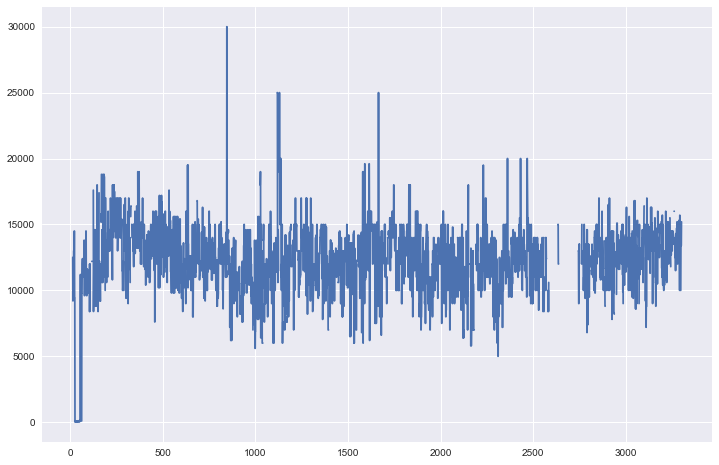

In [355]:
plt.figure(figsize=(12,8))
plt.plot(newdata['N09NT2'])

In [356]:
##define a view of the rows with above 12000 visc and below 8000 visc
wr = newdata[(newdata['N09NT2'] > 12000) | (newdata['N09NT2'] < 8000)]

,DATE,BATCH #,IM- 009 DATE MADE,IM-009 BATCH #,"IM-009 SOLIDS, %",IM-009 VISC,IM-050 VISC,VISC. AFTER ADDING IM-050,TEMP,VISC AFTER ADDING IM-032,...,2 MONTH VISC,3 MONTH VISC,4 MONTH VISC,5 MONTH VISC,6 MONTH VISC,4 GAL,1 GAL,END TANK,BY,YEAR
14,2006-08-18,HGC-214,2006-08-10,HGC-161,55.90,12500.0,500.0,6000.0,80.0,4500.0,...,60000.0,64000.0,62000.0,NaN,48000.0,NaN,NaN,NaN,NaN,2006
19,2006-08-29,HGC-303,2006-08-25,HGC-286,61.09,13000.0,200.0,8500.0,87.0,7500.0,...,48000.0,50000.0,NaN,NaN,45000.0,NaN,NaN,NaN,NaN,2006
20,2006-08-31,HGC-304,2006-08-25,HGC-286,61.09,13000.0,250.0,9000.0,85.0,9000.0,...,54000.0,52000.0,NaN,NaN,48000.0,NaN,NaN,NaN,NaN,2006
22,2006-09-12,HGC-340,2006-09-08,HGC-342,61.04,14500.0,500.0,6800.0,88.0,6000.0,...,60000.0,56000.0,NaN,NaN,52000.0,NaN,NaN,NaN,NaN,2006
23,2006-09-13,HGC-339,2006-09-08,HGC-342,61.04,14500.0,500.0,7500.0,80.0,6900.0,...,58000.0,58000.0,NaN,NaN,54000.0,NaN,NaN,NaN,NaN,2006


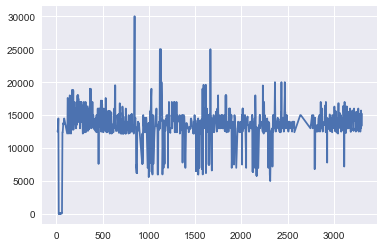

In [357]:
plt.plot(wr['N09NT2'])

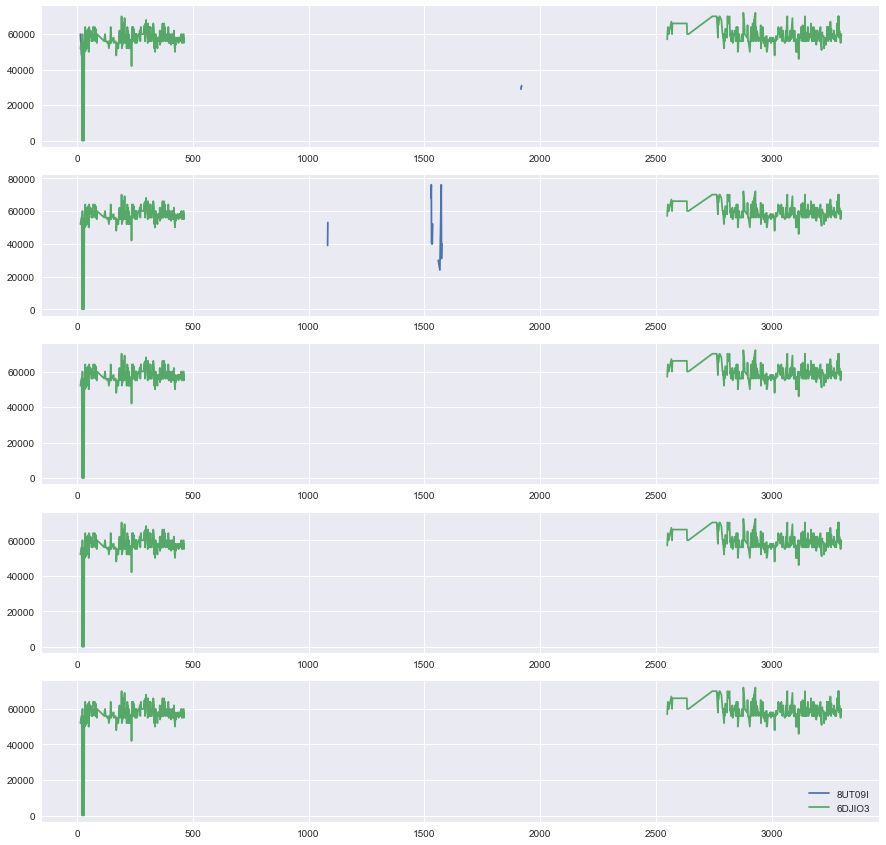

In [358]:
fig = plt.figure(figsize=(15,15))
axes1 = fig.add_subplot(511)
axes2 = fig.add_subplot(512)
axes3 = fig.add_subplot(513)
axes4 = fig.add_subplot(514)
axes5 = fig.add_subplot(515)

plt.sca(axes1) #set axis instance
plt.plot(wr['MAKJDU'], label='MAKJDU')
plt.plot(wr['6DJIO3'],  label='6DJIO3')

plt.sca(axes2)
plt.plot(wr['HCG73Y'], label='HCG73Y')
plt.plot(wr['6DJIO3'],  label='6DJIO3')

plt.sca(axes3)
plt.plot(wr['88UDU8'], label='88UDU8')
plt.plot(wr['6DJIO3'],  label='6DJIO3')

plt.sca(axes4)
plt.plot(wr['AMKLWE'], label='AMKLWE')
plt.plot(wr['6DJIO3'],  label='6DJIO3')

plt.sca(axes5)
plt.plot(wr['8UT09I'], label='8UT09I')
plt.plot(wr['6DJIO3'],  label='6DJIO3')

plt.legend()

Data needs more feature engineering and cleaning before continuing.